<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Preparing_Your_Data_For_Training_With_DataLoaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- The **Dataset** retrieves our dataset's sample and features one at a time.
- When training our model we want to pass our model's samples in mini-batches. 
- We reshuffle the dataset after every epoch to avoid overfitting.
- We use Python's multiprocessing to speed up data retrieval

In machine learning we need to specify features and labels in our dataset:
- Features are the inputs labels are the outputs
- Features are the patterns in image pixels 
The dataloader is an iterable that abstracts this complexity for us:
- We use the dataloader we need to set the following parameters:
 - Data:The training data we'll use to train , test and evaluate the model.
 - Batch size is the number of records to be processed in each batch
 - shuffle the random samples of the data by indices.
 - 

In [ ]:
import torch

In [ ]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor,Lambda
import matplotlib.pyplot as plt

In [ ]:
training_data = datasets.FashionMNIST( 
root= "data",
train = True,
download= True,
transform = ToTensor()
)

In [ ]:
test_data = datasets.FashionMNIST(
    root="data",
    download=True,
    train = False,
    transform=ToTensor()    
)

In [ ]:
from torch.utils.data import DataLoader
train_load= DataLoader(training_data, batch_size=64,shuffle=True)
test_loder = DataLoader(test_data, batch_size=64, shuffle=True)

In [7]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets 
from torchvision.transforms import ToTensor,Lambda
import matplotlib.pyplot as plt

In [8]:
#Load the training data
training_data= datasets.FashionMNIST(
    root = "data",
    train=True,
    download=True,
    transform=ToTensor()      
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [9]:
testing_data = datasets.FashionMNIST(
    root = "data",
    train= False,
    download = True,
    transform = ToTensor())

In [13]:
#Labels for our data
label_map = { 
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

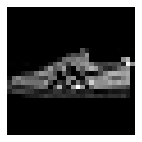

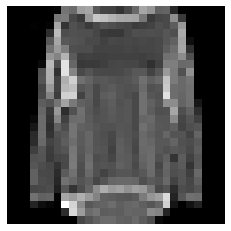

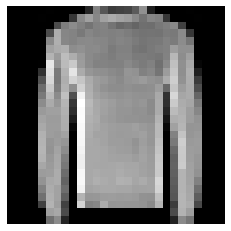

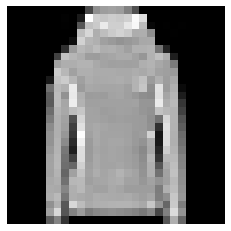

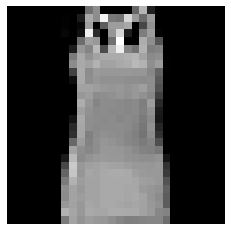

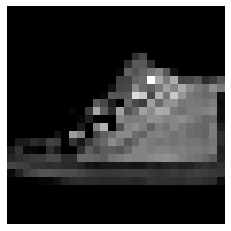

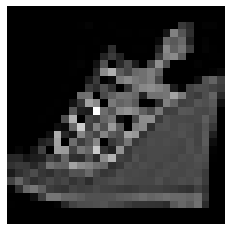

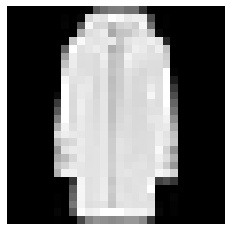

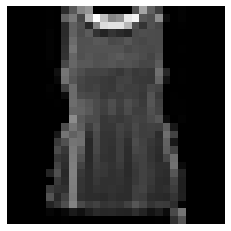

In [45]:
#Visualising the data 
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1,cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows,cols, i)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
  plt.show()

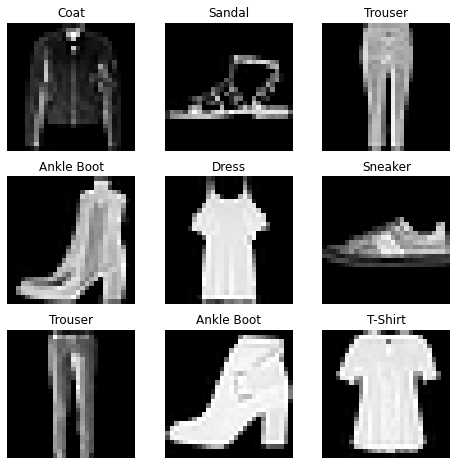

In [55]:
figure = plt.figure(figsize=(8,8))
rows,cols = 3,3
for i in range(1,rows * cols + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.axis("off")  
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(label_map[label])

In [59]:
#The Dataset retrieves our dataset's features and labels 
from torch.utils.data import DataLoader
data_load = DataLoader(training_data, batch_size=64, shuffle=True)#Here we pass in the training data the size of each batch and whether we could shuffle or not
testing_loader = DataLoader(testing_data, batch_size=64, shuffle = True)
#We reshuffle the data at every epoch to reduce overfitting, and speed up retrieval by using Python's multi-processing 
